In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #use matplotlib para python > 3 e conda


In [5]:
caminho = "Datasets/bosch/"
#se o inicializar o conda+jupyter pelo terminal:  colocar caminho = "" 
arquivo ="ToolDataSheetVsNQuebras.csv" #<- arquivo a ser utilizado

### Utilizando a limpeza de dados sugerida pelo Felipe, com relacao ao separador e o angulo de incidencia na peça

In [6]:
dadosB = None

try:  # carrega dos dados , o separador é ";" pois tem campos na coluna Supplier com ","
    dadosB = pd.read_csv(caminho+arquivo, sep=";")
except IOError as err:
    print (err)

In [7]:
dadosB = dadosB[dadosB.PropellerAngle <= 360] #remove os demais dados incorretos

In [63]:
display(dadosB)

,PartNumber,nQuebras,Family,Supplier,LargerDiameter,StemDiameter,TotalLength,ChannelLength,MaterialClass,PropellerAngle,Refrigeration
0,4721700050,5,217-RH,3M TECHNICAL CERAMICS ZWEIGNIEDERLA,3.00,3.0,38.0,2.5,Desconhecido,0.0,0
1,4700101394,26,001-BA,ALLIANCE CNC,10.70,12.0,92.0,50.0,K30/40-UF,30.0,1
2,4700101395,28,001-BA,ALLIANCE CNC,9.70,10.0,92.0,50.0,K30/40-UF,30.0,1
3,4700500778,5,005-BG,ALLIANCE CNC,4.00,6.0,58.0,17.0,K30/40-UF,27.0,0
4,4700700155,9,007-BK,BLICKLE WERKZEUGE GMBH & CO KG,6.00,6.0,66.0,25.0,K30/40-UF,15.0,1
...,...,...,...,...,...,...,...,...,...,...,...
215,4700400439,17,004-BF,ROBERT BOSCH - TOOLING CENTER,2.05,12.0,197.0,137.0,S20/B,0.0,1
216,4700400448,4,004-BF,ROBERT BOSCH - TOOLING CENTER,2.20,12.0,181.0,121.0,S20,0.0,1
217,4700400454,1,004-BF,ROBERT BOSCH - TOOLING CENTER,1.91,10.0,140.0,66.0,S20,0.0,1
218,4700400458,11,004-BF,ROBERT BOSCH - TOOLING CENTER,1.25,12.0,115.0,39.0,S20,0.0,1


### A principio era pra realizar a regressao linear mas acabei fazendo o SGD tbm para comparar

#### Importando o regressor e definindo variáveis x e y

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn import preprocessing

In [192]:
dadosB.columns

Index(['PartNumber', 'nQuebras', 'Family', 'Supplier', 'LargerDiameter',
       'StemDiameter', 'TotalLength', 'ChannelLength', 'MaterialClass',
       'PropellerAngle', 'Refrigeration'],
      dtype='object')

In [2]:
def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted,y)

In [56]:
X = dadosB.loc[:,['PartNumber', 'Family', 'Supplier', 'LargerDiameter',
       'StemDiameter', 'TotalLength', 'ChannelLength', 'MaterialClass',
       'PropellerAngle', 'Refrigeration']]


y = dadosB.loc[:,['nQuebras']]

### fazendo encoder para variaveis string

In [57]:
# percebi que uma das linhas de material class tinha float pq o encoder nao estava funcionando.

#tentando fazer um cast (nao funcionou mas descobri que o problema era na 84)


for i in range(len(X['MaterialClass'])):
    try:
        if isinstance(X['MaterialClass'][i],str):

            print('ok', i)
        else:
            X['MaterialClass'][i]=str(X['MaterialClass'][i])
            
    except:
        pass
#         print(X['MaterialClass'][i])

#         print(type(X['MaterialClass'][i]))
    

X.drop(X.index[84])
y.drop(y.index[84])

ok 0
ok 1
ok 2
ok 3
ok 4
ok 5
ok 6
ok 7
ok 8
ok 9
ok 10
ok 11
ok 12
ok 13
ok 14
ok 15
ok 16
ok 17
ok 18
ok 19
ok 20
ok 21
ok 22
ok 23
ok 24
ok 25
ok 26
ok 27
ok 28
ok 29
ok 30
ok 31
ok 32
ok 33
ok 34
ok 35
ok 36
ok 37
ok 38
ok 39
ok 40
ok 41
ok 42
ok 43
ok 44
ok 45
ok 46
ok 48
ok 49
ok 50
ok 51
ok 52
ok 53
ok 54
ok 55
ok 56
ok 57
ok 58
ok 59
ok 60
ok 61
ok 62
ok 63
ok 64
ok 65
ok 66
ok 67
ok 68
ok 69
ok 70
ok 71
ok 72
ok 73
ok 74
ok 75
ok 76
ok 77
ok 78
ok 79
ok 80
ok 81
ok 82
ok 83
ok 85
ok 86
ok 87
ok 88
ok 89
ok 90
ok 91
ok 92
ok 93
ok 94
ok 95
ok 96
ok 97
ok 98
ok 99
ok 100
ok 101
ok 102
ok 103
ok 104
ok 105
ok 106
ok 107
ok 108
ok 109
ok 110
ok 111
ok 112
ok 113
ok 114
ok 115
ok 116
ok 117
ok 118
ok 119
ok 120
ok 121
ok 122
ok 123
ok 124
ok 125
ok 126
ok 127
ok 128
ok 129
ok 130
ok 131
ok 132
ok 133
ok 134
ok 135
ok 136
ok 137
ok 138
ok 139
ok 140
ok 141
ok 142
ok 143
ok 144
ok 145
ok 146
ok 147
ok 148
ok 149
ok 150
ok 151
ok 152
ok 153
ok 154
ok 155
ok 156
ok 157
ok 158
ok 159
ok

/home/leticia/miniconda3/envs/ambi/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,nQuebras
0,5
1,26
2,28
3,5
4,9
...,...
215,17
216,4
217,1
218,11


In [58]:
le = preprocessing.LabelEncoder()

    
X['Family'] = le.fit_transform(X['Family'])
X['MaterialClass'] = le.fit_transform(X['MaterialClass'])
X['Supplier'] = le.fit_transform(X['Supplier'])




### normalizando pra sgd

In [63]:
from sklearn.preprocessing import MinMaxScaler

# REGRESSAO LINEAR

X_unico = np.array(X['TotalLength']).reshape(-1, 1)

reg = LinearRegression().fit(X_unico,y)

## SGD - NORMALIZADORES

colunas = X.columns
scaler_y = MinMaxScaler()
scaler.fit_transform
y_ = scaler_y.fit_transform(y)
scaler_x = MinMaxScaler()
X_ = pd.DataFrame(scaler_x.fit_transform(X), columns = colunas) 

regg = SGDRegressor().fit(X_,y_)

/home/leticia/miniconda3/envs/ambi/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Usar modelo reg para reg linear, regg para sgd 

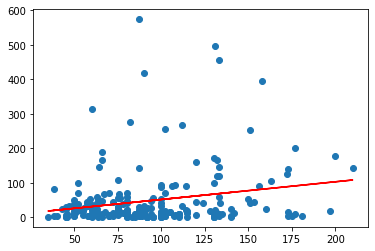

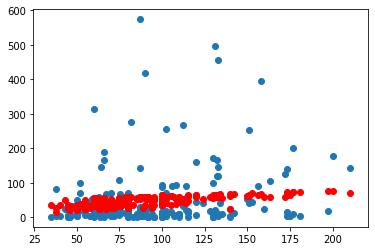

In [64]:
import numpy as np


Y_pred = reg.predict(X_unico)
Y_pred_ = regg.predict(X_)


# REG LINEAR

plt.scatter(X_unico, y)
plt.plot(X_unico, Y_pred, color = 'red')
plt.show()

# REGRESSOR GRAD DESC

# NORMALIZACAO INVERSE PRA PLOTAR!!

X_  = pd.DataFrame(scaler_x.inverse_transform(X_), columns = colunas)
y_ = scaler_y.inverse_transform(y_)
Y_pred_ = scaler_y.inverse_transform(Y_pred_.reshape(-1, 1))


#display(X_)

#figg = plt.subplot((2,2,2))
plt.scatter(X_['TotalLength'], y_)
plt.scatter(X_['TotalLength'], Y_pred_, color = 'red')

plt.show()

In [65]:
rss_ = calc_rss(y_,Y_pred_)
r2_ = calc_r2(y_,Y_pred_)

print('r2', r2_, 'rss', rss_, 'MULTIVAR')

r2 -34.63305925889424 rss 1497314.8323306749 MULTIVAR


In [66]:
rss = calc_rss(y,reg.predict(X_unico))
r2 = calc_r2(y,reg.predict(X_unico))

print('r2', r2, 'rss', rss, 'LINEAR')

r2 -19.86189450237191 rss 1505673.241366632 LINEAR


## Sugestoes para melhorar o modelo:
avaliar quebras com e sem a presenca do fluido refrigerante

avaliar pelo tipo de material

### com fluido de refrig

In [81]:
dadosB2 = dadosB.loc[dadosB['Refrigeration']==1]

X = dadosB2.loc[:,['PartNumber', 'Family', 'Supplier', 'LargerDiameter',
       'StemDiameter', 'TotalLength', 'ChannelLength', 'MaterialClass',
       'PropellerAngle', 'Refrigeration']]

#X.drop(X.index[84])

le = preprocessing.LabelEncoder()
    
X['Family'] = le.fit_transform(X['Family'])
X['MaterialClass'] = le.fit_transform(X['MaterialClass'])
X['Supplier'] = le.fit_transform(X['Supplier'])

y = dadosB2['nQuebras']

In [ ]:
## Definir a coluna pra regressao com um atributo soh

In [82]:
from sklearn.preprocessing import MinMaxScaler

X_unico = np.array(X['TotalLength']).reshape(-1, 1)

reg = LinearRegression().fit(X_unico,y)

colunas = X.columns
scaler_y = MinMaxScaler()
scaler.fit_transform
y_ = scaler_y.fit_transform(np.array(y).reshape(-1, 1))

scaler_x = MinMaxScaler()
X_ = pd.DataFrame(scaler_x.fit_transform(X), columns = colunas) 
regg = SGDRegressor().fit(X_,y_)

/home/leticia/miniconda3/envs/ambi/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


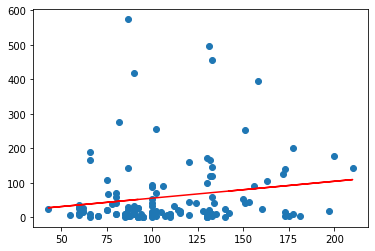

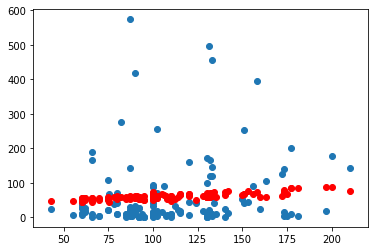

In [83]:
Y_pred = reg.predict(X_unico)
Y_pred_ = regg.predict(X_)


fig = plt.scatter(X_unico, y)
fig2 = plt.plot(X_unico, Y_pred, color = 'red')
plt.show()

# NORMALIZACAO INVERSE PRA PLOTAR!!

X_  = pd.DataFrame(scaler_x.inverse_transform(X_), columns = colunas)
y_ = scaler_y.inverse_transform(y_)
Y_pred_ = scaler_y.inverse_transform(Y_pred_.reshape(-1, 1))


figg = plt.scatter(X_['TotalLength'], y_)
fig3 = plt.scatter(X_['TotalLength'], Y_pred_, color = 'red')

plt.show()

In [84]:
r2_ = calc_r2(y_,Y_pred_)
rss = calc_rss(y_,Y_pred_)

print('r2', r2_, 'rss', rss_, 'MULTIVAR')

r2 -127.11488685174331 rss 1497314.8323306749 MULTIVAR


In [85]:
rss = calc_rss(y,reg.predict(X_unico))
r2 = calc_r2(y,reg.predict(X_unico))

print('r2', r2, 'rss', rss, 'LINEAR')

r2 -34.899999660711615 rss 1291557.6645922083 LINEAR


### Com unico material, s20

In [91]:
dadosB3 = dadosB.loc[dadosB['MaterialClass']=='S20']

X = dadosB3.loc[:,['PartNumber', 'Family', 'Supplier', 'LargerDiameter',
       'StemDiameter', 'TotalLength', 'ChannelLength', 'MaterialClass',
       'PropellerAngle', 'Refrigeration']]


le = preprocessing.LabelEncoder()
    
X['Family'] = le.fit_transform(X['Family'])
X['MaterialClass'] = le.fit_transform(X['MaterialClass'])
X['Supplier'] = le.fit_transform(X['Supplier'])

y = dadosB3['nQuebras']

In [92]:
from sklearn.preprocessing import MinMaxScaler

X_unico = np.array(X['TotalLength']).reshape(-1, 1)

reg = LinearRegression().fit(X_unico,y)

colunas = X.columns
scaler_y = MinMaxScaler()
scaler.fit_transform
y_ = scaler_y.fit_transform(np.array(y).reshape(-1, 1))

scaler_x = MinMaxScaler()
X_ = pd.DataFrame(scaler_x.fit_transform(X), columns = colunas) 
regg = SGDRegressor().fit(X_,y_)

/home/leticia/miniconda3/envs/ambi/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


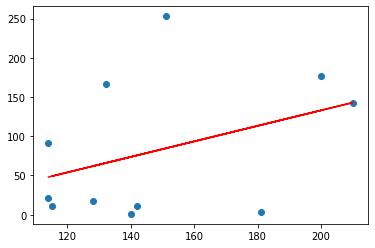

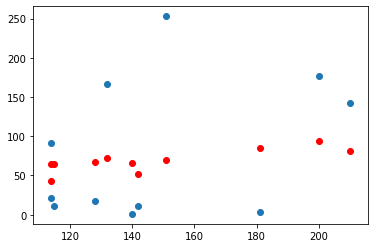

In [93]:
Y_pred = reg.predict(X_unico)
Y_pred_ = regg.predict(X_)

plt.scatter(X_unico, y)
plt.plot(X_unico, Y_pred, color = 'red')
plt.show()

# NORMALIZACAO INVERSE PRA PLOTAR!!

X_  = pd.DataFrame(scaler_x.inverse_transform(X_), columns = colunas)
y_ = scaler_y.inverse_transform(y_)
Y_pred_ = scaler_y.inverse_transform(Y_pred_.reshape(-1, 1))


figg = plt.scatter(X_['TotalLength'], y_)
fig3 = plt.scatter(X_['TotalLength'], Y_pred_, color = 'red')

plt.show()

In [94]:
rss_ = calc_rss(y_,Y_pred_)
r2_ = calc_r2(y_,Y_pred_)

print('r2', r2_, 'rss', rss_, 'MULTIVAR')

rss = calc_rss(y,reg.predict(X_unico))
r2 = calc_r2(y,reg.predict(X_unico))

print('r2', r2, 'rss', rss, 'LINEAR')

r2 -35.645159407259825 rss 75158.6018795397 MULTIVAR
r2 -4.910632552810284 rss 68195.03854981821 LINEAR


### Em resumo os resultados nao ficaram muito bons e fazer com o SGD nao melhorou mto tbm